In 2019, there were 58354932.0 deaths worldwide from all causes.
That means that asbestos caused 0.44% of all deaths worldwide in 2019.
Of the 10 million cancer deaths (estimated) in 2019, asbestos has cause 2.55% of them.
As you can see in the image below, this is less than the contribution of other major risk factors, like heart diseases, diabetes, pneumonia, and traffic accidents


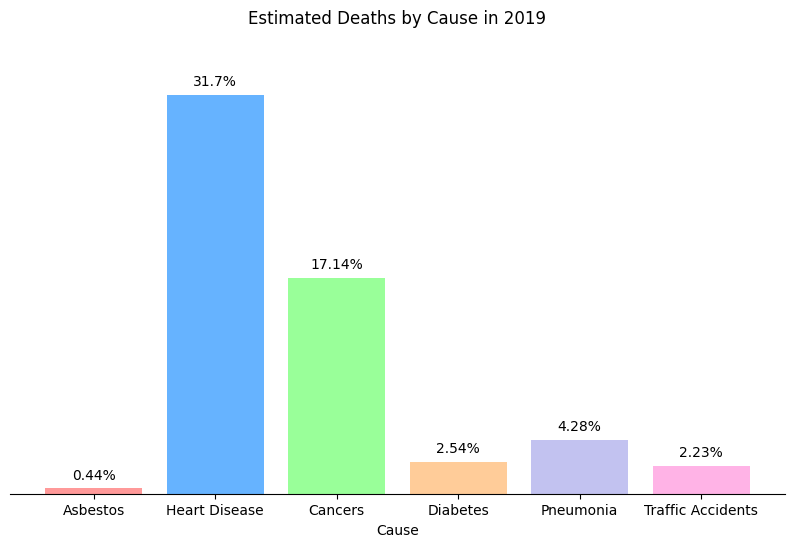

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Fetch the data.
df = pd.read_csv("https://ourworldindata.org/grapher/number-of-deaths-per-year.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/number-of-deaths-per-year.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()
asbestos_deaths = 255000 # source: Furuya, S., Chimed-Ochir, O., Takahashi, K., David, A., & Takala, J. (2018). Global Asbestos Disaster. International Journal of Environmental Research and Public Health, 15(5), 1000. https://doi.org/10.3390/ijerph15051000
# to mess with the data, conflate this with a different source: namely the "deaths per year" from the UN, World Population Prospects (2024) dataset
# and also conflate it with the "Global Burden of Disease study by the Institute for Health Metrics and Evaluation (IHME) in 2019 and the Global Terrorism Database.", for which we sourced a graphic from Our World in Data

worldwide_deaths = df[df["Entity"] == "World"]

worldwide_deaths_2019 = worldwide_deaths[worldwide_deaths["Year"] == 2019]["deaths__sex_all__age_all__variant_estimates"].values[0]
print(f"In 2019, there were {worldwide_deaths_2019} deaths worldwide from all causes.")
print(f"That means that asbestos caused {asbestos_deaths / worldwide_deaths_2019 * 100:.2f}% of all deaths worldwide in 2019.")
print(f"Of the 10 million cancer deaths (estimated) in 2019, asbestos has cause {asbestos_deaths / 10_000_000 * 100:.2f}% of them.")
print("As you can see in the image below, this is less than the contribution of other major risk factors, like heart diseases, diabetes, pneumonia, and traffic accidents")

death_causes = pd.DataFrame({
    "Cause": ["Asbestos", "Heart Disease", "Cancers", "Diabetes", "Pneumonia", "Traffic Accidents"],
    "Deaths": [255000, 18500000, 10000000, 1485000, 2500000, 1300000],
})
# format with two decimal places
death_causes["Percentage"] = (death_causes["Deaths"] / worldwide_deaths_2019 * 100).round(2)

# plot the data, percentages of total deaths
plt.figure(figsize=(10,6))
bars = plt.bar(death_causes["Cause"], death_causes["Percentage"], color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])
plt.title("Estimated Deaths by Cause in 2019")
plt.xlabel("Cause")
plt.yticks([])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval}%', ha='center', va='bottom')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().set_axisbelow(True)
plt.ylim(0, max(death_causes["Percentage"]) + 5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()

![](image.avif)